In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidjfisher/illinois-doc-labeled-faces-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.11G/6.11G [01:04<00:00, 102MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/davidjfisher/illinois-doc-labeled-faces-dataset/versions/1


In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
import os
os.chdir(path)

In [ ]:
!pip install imagehash

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imagehash
import os
import seaborn as sns

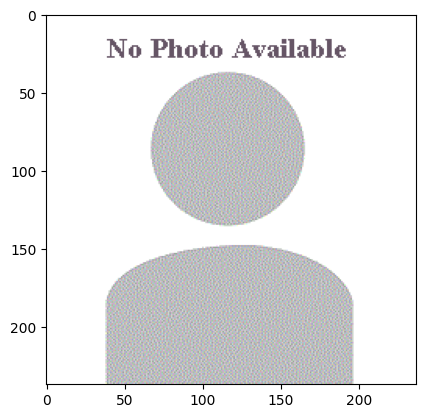

In [ ]:
img = Image.open('front/front/A00220.jpg')

plt.imshow(img)

In [ ]:
#hash value for empty image
hash_value = imagehash.average_hash(img)
hash_value

array([[ True,  True,  True,  True,  True, False,  True,  True],
       [ True,  True,  True, False, False,  True,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True,  True, False, False,  True,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False,  True]])

In [ ]:
empty = []
for filename in os.listdir('./front/front/'):
  if filename.endswith(("jpg", "png", "jpeg")):
    img = Image.open(f'./front/front/{filename}')
    hash = imagehash.average_hash(img)

  if hash == hash_value:
    empty.append(filename)

empty



['X79086.jpg',
 'R91986.jpg',
 'C70779.jpg',
 'X78292.jpg',
 'R92737.jpg',
 'X78586.jpg',
 'S15318.jpg',
 'M52021.jpg',
 'Y25242.jpg',
 'X78977.jpg',
 'X77126.jpg',
 'X79079.jpg',
 'R11848.jpg',
 'N04168.jpg',
 'B43470.jpg',
 'M48614.jpg',
 'S15062.jpg',
 'Y12165.jpg',
 'R33753.jpg',
 'X69543.jpg',
 'X73485.jpg',
 'X79092.jpg',
 'X53896.jpg',
 'Y32562.jpg',
 'X77741.jpg',
 'X76922.jpg',
 'R06494.jpg',
 'X77884.jpg',
 'X78562.jpg',
 'X76976.jpg',
 'B43613.jpg',
 'M46373.jpg',
 'Y23482.jpg',
 'X78512.jpg',
 'Y29696.jpg',
 'X78454.jpg',
 'A86277.jpg',
 'Y24051.jpg',
 'X73205.jpg',
 'X78543.jpg',
 'R92703.jpg',
 'X78960.jpg',
 'X79046.jpg',
 'N81801.jpg',
 'X77074.jpg',
 'Y32531.jpg',
 'Y22453.jpg',
 'X78123.jpg',
 'X78937.jpg',
 'X77729.jpg',
 'R67647.jpg',
 'X78240.jpg',
 'X78805.jpg',
 'Y12982.jpg',
 'R81331.jpg',
 'C01829.jpg',
 'X77845.jpg',
 'X76223.jpg',
 'X79049.jpg',
 'R61722.jpg',
 'Y23490.jpg',
 'N84632.jpg',
 'X77892.jpg',
 'M46784.jpg',
 'S11520.jpg',
 'C08345.jpg',
 'X78198.j

In [ ]:
empty = [img.replace(".jpg", "") for img in empty]
empty

['X79086',
 'R91986',
 'C70779',
 'X78292',
 'R92737',
 'X78586',
 'S15318',
 'M52021',
 'Y25242',
 'X78977',
 'X77126',
 'X79079',
 'R11848',
 'N04168',
 'B43470',
 'M48614',
 'S15062',
 'Y12165',
 'R33753',
 'X69543',
 'X73485',
 'X79092',
 'X53896',
 'Y32562',
 'X77741',
 'X76922',
 'R06494',
 'X77884',
 'X78562',
 'X76976',
 'B43613',
 'M46373',
 'Y23482',
 'X78512',
 'Y29696',
 'X78454',
 'A86277',
 'Y24051',
 'X73205',
 'X78543',
 'R92703',
 'X78960',
 'X79046',
 'N81801',
 'X77074',
 'Y32531',
 'Y22453',
 'X78123',
 'X78937',
 'X77729',
 'R67647',
 'X78240',
 'X78805',
 'Y12982',
 'R81331',
 'C01829',
 'X77845',
 'X76223',
 'X79049',
 'R61722',
 'Y23490',
 'N84632',
 'X77892',
 'M46784',
 'S11520',
 'C08345',
 'X78198',
 'X76988',
 'X76701',
 'X62757',
 'X78225',
 'X75015',
 'K59208',
 'Y19379',
 'X78132',
 'Y22386',
 'X50433',
 'X78180',
 'X79010',
 'X69087',
 'X78041',
 'X78287',
 'M38338',
 'Y23313',
 'X76421',
 'B88246',
 'X78886',
 'B87900',
 'X77278',
 'M39656',
 'X76846',

In [ ]:
df = pd.read_csv('output1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68492 entries, 0 to 68491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      68147 non-null  object
 1   date_of_birth  68093 non-null  object
 2   sex            68149 non-null  object
 3   race           68145 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68492 entries, 0 to 68491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      68147 non-null  object
 1   date_of_birth  68093 non-null  object
 2   sex            68149 non-null  object
 3   race           68145 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68090 entries, 0 to 68491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      68090 non-null  object
 1   date_of_birth  68090 non-null  object
 2   sex            68090 non-null  object
 3   race           68090 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [ ]:
#removing entries with no images
df = df[~df['inmate_id'].isin(empty)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 67130 entries, 0 to 68491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      67130 non-null  object
 1   date_of_birth  67130 non-null  object
 2   sex            67130 non-null  object
 3   race           67130 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [ ]:
#droping none vales
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67130 entries, 0 to 68491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      67130 non-null  object
 1   date_of_birth  67130 non-null  object
 2   sex            67130 non-null  object
 3   race           67130 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [ ]:
df.head()

,inmate_id,date_of_birth,sex,race
0,M38424,10/27/1995,Male,Black
1,R20304,07/31/1980,Male,White
2,K89497,11/13/1953,Male,White
3,Y10688,10/17/1989,Male,Hispanic
4,M41272,04/10/1996,Male,Black


In [ ]:
#finding age of each member
df['age'] = 2019 - pd.to_datetime(df['date_of_birth']).dt.year
df['age'] = df['age'].astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67130 entries, 0 to 68491
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      67130 non-null  object
 1   date_of_birth  67130 non-null  object
 2   sex            67130 non-null  object
 3   race           67130 non-null  object
 4   age            67130 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 4.8+ MB


In [ ]:
def age_bin(age):
  if age >= 13 and age <= 29:
    return '19-29'
  elif age >= 30 and age <= 39:
    return '30-39'
  elif age >= 40 and age <= 49:
    return '40-49'
  elif age >= 50 and age <= 59:
    return '50-59'
  elif age >= 60 and age <= 69:
    return '60-69'
  elif age >= 70 and age <= 79:
    return '70-79'
  else:
    return '80-96'
df['age_group'] = df['age'].apply(age_bin)
df.head()

,inmate_id,date_of_birth,sex,race,age,age_group
0,M38424,10/27/1995,Male,Black,24,19-29
1,R20304,07/31/1980,Male,White,39,30-39
2,K89497,11/13/1953,Male,White,66,60-69
3,Y10688,10/17/1989,Male,Hispanic,30,30-39
4,M41272,04/10/1996,Male,Black,23,19-29


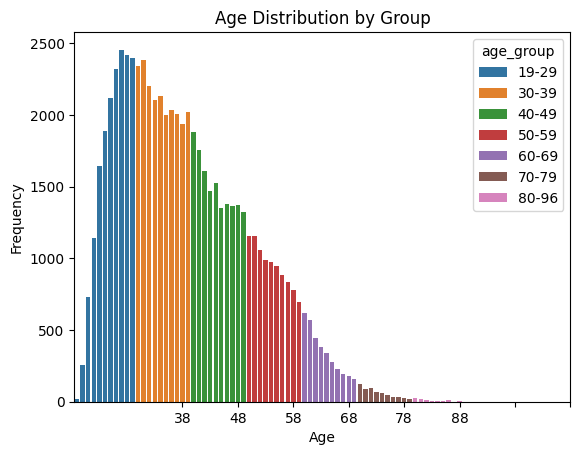

In [ ]:
df2 = df.groupby(["age", "age_group"]).size().reset_index(name="count")

sns.barplot(data=df2, x="age", y="count", hue="age_group")
plt.title("Age Distribution by Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(ticks=range(df['age'].min(), df['age'].max(), 10))
plt.show()

In [ ]:
df['sex'].value_counts()

,count
sex,
Male,62504
Female,4626


In [ ]:
df = df.loc[df['race'] != 'Unknown']
df['race'].value_counts()

,count
race,
Black,37601
White,20453
Hispanic,8598
Asian,233
Amer Indian,103
Bi-Racial,92


In [ ]:
females = df[df['sex'] == 'Female']
females.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4621 entries, 17 to 68454
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      4621 non-null   object
 1   date_of_birth  4621 non-null   object
 2   sex            4621 non-null   object
 3   race           4621 non-null   object
 4   age            4621 non-null   int32 
 5   age_group      4621 non-null   object
dtypes: int32(1), object(5)
memory usage: 234.7+ KB


In [ ]:
males = df[df['sex'] == 'Male']
males['race'].value_counts()

,count
race,
Black,35917
White,17961
Hispanic,8268
Asian,211
Amer Indian,69
Bi-Racial,33


In [ ]:
males_underreprented = males[~(males['race'] == 'Black') & ~(males['race'] == 'White') & ~(males['race'] == 'Hispanic')]
males_underreprented.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 677 to 68480
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      313 non-null    object
 1   date_of_birth  313 non-null    object
 2   sex            313 non-null    object
 3   race           313 non-null    object
 4   age            313 non-null    int32 
 5   age_group      313 non-null    object
dtypes: int32(1), object(5)
memory usage: 15.9+ KB


In [ ]:
df_final = pd.concat([females,males_underreprented])
remaling_slots = 10000 - df_final.shape[0]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4934 entries, 17 to 68480
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      4934 non-null   object
 1   date_of_birth  4934 non-null   object
 2   sex            4934 non-null   object
 3   race           4934 non-null   object
 4   age            4934 non-null   int32 
 5   age_group      4934 non-null   object
dtypes: int32(1), object(5)
memory usage: 250.6+ KB


In [ ]:
males = males[(males['race'] == 'Black') | (males['race'] == 'White') | (males['race'] == 'Hispanic')]
males

,inmate_id,date_of_birth,sex,race,age,age_group
0,M38424,10/27/1995,Male,Black,24,19-29
1,R20304,07/31/1980,Male,White,39,30-39
2,K89497,11/13/1953,Male,White,66,60-69
3,Y10688,10/17/1989,Male,Hispanic,30,30-39
4,M41272,04/10/1996,Male,Black,23,19-29
...,...,...,...,...,...,...
68487,M40133,10/15/1986,Male,White,33,30-39
68488,R52346,12/23/1987,Male,Black,32,30-39
68489,K72857,09/16/1959,Male,Black,60,60-69
68490,R65066,07/20/1988,Male,White,31,30-39


In [ ]:
males['age_group'].value_counts()

,count
age_group,
30-39,19371
19-29,16298
40-49,13858
50-59,8766
60-69,3208
70-79,560
80-96,85


In [ ]:
white_males = males[males['race'] == 'White']
white_males['age_group'].value_counts()

,count
age_group,
30-39,5931
40-49,4206
19-29,3571
50-59,2829
60-69,1090
70-79,283
80-96,51


In [ ]:

black_males = males[males['race'] == 'Black']
black_males['age_group'].value_counts()

,count
age_group,
30-39,10695
19-29,10528
40-49,7620
50-59,5021
60-69,1808
70-79,221
80-96,24


In [ ]:
hispanic_males = males[males['race'] == 'Hispanic']
hispanic_males['age_group'].value_counts()

,count
age_group,
30-39,2745
19-29,2199
40-49,2032
50-59,916
60-69,310
70-79,56
80-96,10


In [ ]:

# def age_group_proportional_sampling(
#     df,
#     target_n,
#     age_col="age_group",
#     rare_threshold=0.05,
#     random_state=42
# ):
#     """
#     Perform age-group proportional sampling on df.

#     Parameters:
#     - df: pandas DataFrame (already filtered to one race / one sex)
#     - target_n: number of samples to return
#     - age_col: column containing age groups
#     - rare_threshold: fraction below which an age group is considered rare
#     - random_state: reproducibility seed

#     Returns:
#     - sampled DataFrame of size target_n
#     """

#     if len(df) <= target_n:
#         return df.copy()

#     # ----------------------------------
#     # 1️⃣ Identify rare age groups
#     # ----------------------------------
#     age_counts = df[age_col].value_counts()
#     total = len(df)

#     rare_ages = age_counts[age_counts < rare_threshold * total].index.tolist()

#     rare_df = df[df[age_col].isin(rare_ages)]
#     common_df = df[~df[age_col].isin(rare_ages)]

#     # ----------------------------------
#     # 2️⃣ Remaining slots after rare ages
#     # ----------------------------------
#     remaining_slots = target_n - len(rare_df)

#     if remaining_slots <= 0:
#         return rare_df.sample(n=target_n, random_state=random_state)

#     # ----------------------------------
#     # 3️⃣ P


roportional sampling of common ages
#     # ----------------------------------
#     sampled_common = []

#     common_counts = common_df[age_col].value_counts()
#     total_common = len(common_df)

#     for age_group, count in common_counts.items():
#         proportion = count / total_common
#         n_samples = int(round(proportion * remaining_slots))

#         age_group_df = common_df[common_df[age_col] == age_group]

#         if n_samples >= len(age_group_df):
#             sampled_common.append(age_group_df)
#         elif n_samples > 0:
#             sampled_common.append(
#                 age_group_df.sample(n=n_samples, random_state=random_state)
#             )

#     sampled_common = pd.concat(sampled_common) if sampled_common else pd.DataFrame()

#     # ----------------------------------
#     # 4️⃣ Fix rounding issues
#     # ----------------------------------
#     sampled = pd.concat([rare_df, sampled_common])

#     if len(sampled) > target_n:
#         sampled = sampled.sample(n=target_n, random_state=random_state)
#     elif len(sampled) < target_n:
#         remaining_pool = df.drop(sampled.index)
#         extra = remaining_pool.sample(
#             n=target_n - len(sampled),
#             random_state=random_state
#         )
#         sampled = pd.concat([sampled, extra])

#     return sampled.reset_index(drop=True)


In [ ]:


def age_group_proportional_sampling(
    df,
    target_n,
    age_col="age_group",
    rare_threshold=0.05,
    random_state=42
):
    """
    Age sampling that preserves the SAME proportion
    without stratified quota calculation.
    """

    if len(df) <= target_n:
        return df.copy()

    # -------------------------------
    # 1️⃣ Identify rare age groups
    # -------------------------------
    age_counts = df[age_col].value_counts()
    total = len(df)

    rare_ages = age_counts[age_counts < rare_threshold * total].index.tolist()

    rare_df = df[df[age_col].isin(rare_ages)]
    common_df = df[~df[age_col].isin(rare_ages)]

    # -------------------------------
    # 2️⃣ Remaining slots
    # -------------------------------
    remaining_slots = target_n - len(rare_df)

    if remaining_slots <= 0:
        return rare_df.sample(n=target_n, random_state=random_state)

    # -------------------------------
    # 3️⃣ SAME-PROPORTION SAMPLING
    # -------------------------------
    sampled_common = common_df.sample(
        n=remaining_slots,
        random_state=random_state
    )

    # -------------------------------
    # 4️⃣ Combine
    # -------------------------------
    sampled = pd.concat([rare_df, sampled_common])

    return sampled.reset_index(drop=True)

In [ ]:
white_df = age_group_proportional_sampling(df = white_males,target_n=1688)
white_df['age_group'].value_counts()

,count
age_group,
30-39,466
40-49,305
70-79,283
19-29,276
50-59,222
60-69,85
80-96,51


In [ ]:
black_df = age_group_proportional_sampling(df = black_males,target_n=1690)
black_df['age_group'].value_counts()

,count
age_group,
19-29,424
30-39,421
40-49,322
70-79,221
50-59,180
60-69,98
80-96,24


In [ ]:
hispanic_df = age_group_proportional_sampling(df = hispanic_males,target_n=1688)
hispanic_df['age_group'].value_counts()

,count
age_group,
30-39,434
40-49,363
19-29,363
60-69,310
50-59,152
70-79,56
80-96,10


In [ ]:
male = pd.concat([white_df,hispanic_df,black_df])
male

,inmate_id,date_of_birth,sex,race,age,age_group
0,M47779,12/02/1946,Male,White,73,70-79
1,Y25366,03/04/1949,Male,White,70,70-79
2,N61050,07/05/1948,Male,White,71,70-79
3,B86385,09/16/1948,Male,White,71,70-79
4,N51714,12/14/1936,Male,White,83,80-96
...,...,...,...,...,...,...
1685,A90240,12/10/1961,Male,Black,58,50-59
1686,Y18227,04/25/1995,Male,Black,24,19-29
1687,M25325,02/11/1982,Male,Black,37,30-39
1688,B15140,07/05/1970,Male,Black,49,40-49


In [ ]:
df_final = pd.concat([df_final,male])
df_final

,inmate_id,date_of_birth,sex,race,age,age_group
17,Y11378,07/17/1972,Female,White,47,40-49
36,R88744,06/09/1974,Female,Black,45,40-49
48,Y13375,06/16/1994,Female,Hispanic,25,19-29
63,R79678,10/01/1982,Female,White,37,30-39
68,R35907,07/03/1971,Female,White,48,40-49
...,...,...,...,...,...,...
1685,A90240,12/10/1961,Male,Black,58,50-59
1686,Y18227,04/25/1995,Male,Black,24,19-29
1687,M25325,02/11/1982,Male,Black,37,30-39
1688,B15140,07/05/1970,Male,Black,49,40-49


In [ ]:
df_final['sex'].value_counts()

,count
sex,
Male,5379
Female,4621


In [ ]:
df_final = df_final.sort_values('inmate_id')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 156 to 54998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inmate_id      10000 non-null  object
 1   date_of_birth  10000 non-null  object
 2   sex            10000 non-null  object
 3   race           10000 non-null  object
 4   age            10000 non-null  int32 
 5   age_group      10000 non-null  object
dtypes: int32(1), object(5)
memory usage: 765.9+ KB


In [ ]:
df_final.to_csv('df_final.csv')

In [ ]:
#removing other images
image_dir = 'front/front'
image_names = list(df_final['inmate_id'].astype(str))
for img in os.listdir(image_dir):
  img_path = os.path.join(image_dir,img)
  img = img.replace(".jpg", "")
  if img not in image_names:
    os.remove(img_path)

<h1>Image Preprocessing</h1>

In [ ]:
image_dir = 'front/front'
out_dir = 'output'
image_names = list(df_final['inmate_id'].astype(str))
for img in os.listdir(image_dir):
  img_path = os.path.join(image_dir,img)
  image = Image.open(img_path).convert('RGB')
  width,height = image.size
  if width == height:
    top = 0
    bottom = height
    left = 0
    right = width
  elif width > height: #croping heigth
    left = (width - height)//2
    right = left + height
    top = 0
    bottom = height
  elif width < height: #croping width
    top = (width - height)//2
    bottom =  top + width
    left = 0
    right = width
  image = image.crop((left,top,right,bottom))
  image = image.resize((320,320)) #rescaling image
  image.save(f'output/{img}')
  print(image.size)

Streaming output truncated to the last 5000 lines.
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(32

In [ ]:
!zip -r data_backup.zip /root/.cache/kagglehub/datasets/davidjfisher/illinois-doc-labeled-faces-dataset/versions/1/output /content/drive/MyDrive/


	zip warning: name not matched: /content/drive/MyDrive/College/Rabaey- By EasyEngineering.net.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/papoulis-probability-random-variables-and-stochastic-processes.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/epdf.pub_linear-algebra-a-modern-introduction.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/Proakis_Digital_Communications_5th_Editi.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/[Boylestad]_Electronic Devices _ Circuit Theory- By EasyEngineering.net.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/Calculus and Analytical Geometry by Thomas and Finney.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/Shepley_L._Ross-Differential_Equations-J.pdf
	zip warning: name not matched: /content/drive/MyDrive/College/Electronic Instrumentation By H.S. Kalsi - By EasyEngineering.net.pdf
	zip warning: name not matched: /content/drive/MyD